# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy.special import expit as sigmoid

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [3]:
a=pd.read_csv("https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv",index_col=None)
x=a['YearsExperience'].values
y=a['Salary'].values
a

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


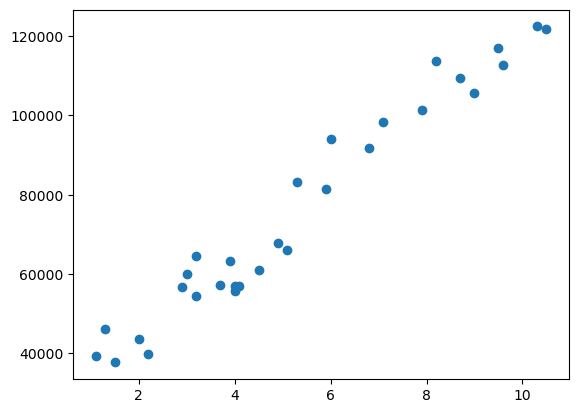

In [4]:
plt.scatter(x,y)

In [5]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [6]:
xmean=X_train.mean()
ymean=Y_train.mean()
xmean

5.662499999999999

In [7]:
a['diffx']=xmean-x
a['diff_sq']=a.diffx**2
ssxx=a.diff_sq.sum()

In [8]:
a['diffy']=ymean-y
ssxy=(a.diffx*a.diffy).sum()

In [9]:
m=ssxy/ssxx

In [10]:
b=ymean-m*xmean

In [11]:
def predict(value):
    pred=[]
    for i in value:
        p=m*i+b
        pred.append(p)
    return pred

In [12]:
ypred=predict(X_test)
print(ypred,Y_test)

[array([89810.0984443]), array([55826.84182937]), array([52994.90377813]), array([39779.19287233]), array([44499.0896244]), array([92642.03649554])] [[91738.]
 [54445.]
 [56642.]
 [37731.]
 [43525.]
 [98273.]]


In [13]:
class linearregression:
    
    def __init__(self,iter=10000,lr=0.01):
        self.iter=iter
        self.lr=lr
        self.w=None
        self.b=None
        
    def fit(self,x,y):
        n_samples, n_features = x.shape
        self.w=np.zeros(n_features)
        self.b=0
        for _ in range(self.iter):
            y_pred=np.dot(x,self.w)+self.b
            dw=(1/n_samples)*np.dot(x.T,(y_pred-y))
            db=(1/n_samples)*np.sum(y_pred-y)
            self.w=self.w-self.lr*dw
            self.b=self.b-self.lr*db
            
    def predict(self,x):
        y_pred=np.dot(x,self.w)+self.b
        return y_pred
    
lreg=linearregression()
lreg.fit(X_train,Y_train)
y_predict=lreg.predict(X_test)
y_predict=y_predict[:,0]
y_predict

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

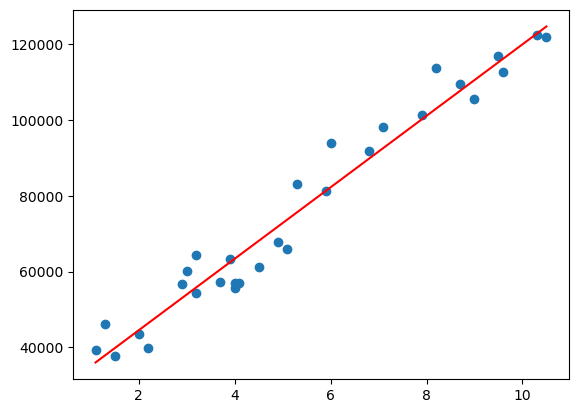

In [14]:
plt.scatter(x,y)
plt.plot(x,m*x+b,'r')

In [15]:

print('actual:',Y_test)
print('predict:',ypred)

actual: [[91738.]
 [54445.]
 [56642.]
 [37731.]
 [43525.]
 [98273.]]
predict: [array([89810.0984443]), array([55826.84182937]), array([52994.90377813]), array([39779.19287233]), array([44499.0896244]), array([92642.03649554])]


In [16]:
#LOGISTIC REGRESSION

In [104]:
a=pd.read_csv("https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv",index_col=None)
a['sal<60000']=[1 if i<60000 else 0 for i in a.Salary]
# a=a.drop(['Salary'],axis=1)
X=np.array(a['YearsExperience'])
X=X.reshape(-1,1)
y=np.array(a['sal<60000'])
y=y.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2)

In [125]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

class logisticregression:
    
    def __init__(self,n_iters=10000,lr=0.001):
        self.lr=lr
        self.n_iters=n_iters
        self.w=None
        self.b=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0
        
        for _ in range(self.n_iters):
            linear_pred=np.dot(X,self.w)+self.b
            prediction=sigmoid(linear_pred)
            
            dw=(1/n_samples)*np.dot(X.T ,(prediction-y))
            db=(1/n_samples)*np.sum(prediction-y)
            self.w=self.w-self.lr*dw
            self.b=self.b-self.lr*db
        return [self.w,self.b] 
            
    def predict(self,X):
        linear_pred=np.dot(X,self.w)+self.b
        y_pred=sigmoid(linear_pred)
        class_pred=[1 if y[0]>0.5 else 0 for y in y_pred]
        return class_pred
     
        
clf=logisticregression()
clf.fit(X_train1,y_train1)
y_predict=clf.predict(X_test1)
print(y_predict,y_test1)
w,b=clf.fit(X_train1,y_train1)
print(w[0][0])
print(b)
# a=linear_model.LogisticRegression()
# a.fit(x,y)
# y_predict=a.predict(x_test1)

# print(y_predict,y_test1)

[1, 1, 0, 1, 0, 0] [[0]
 [1]
 [0]
 [1]
 [0]
 [0]]
-1.0167537778090978
4.05212909521768


In [128]:
def model_plot(model,X_train1,Xtest1,y_train1,y_test1):
    plt.scatter(X_train1,y_train1,color='blue',label='Training data')
    plt.scatter(X_test1,y_test1,color='lightgreen',label='test data')
    plt.xlabel('Salary')
    plt.ylabel('Salary<60000')
    plt.title('scatter plot')
    x=np.linspace(1,12,24)
    y=sigmoid(model[0][0]*(x)+model[1])
    plt.plot(x,y,color='red',label='log reg dec boundary')
    plt.grid()
    plt.legend()
    plt.show()


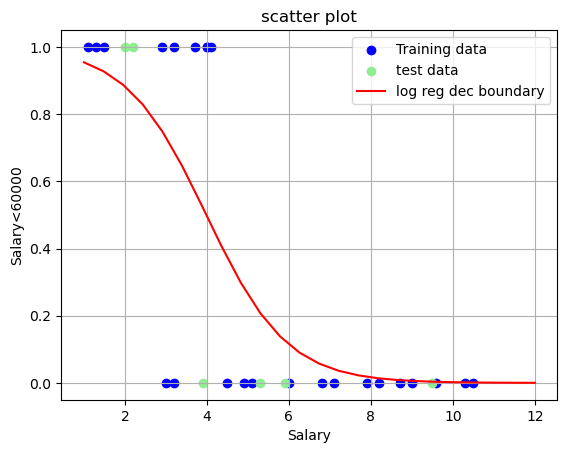

In [129]:
model_plot(clf.fit(X_train1,y_train1),X_train1,X_test1,y_train1,y_test1)


## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Y_test=np.array(Y_test)
ypred=np.array(ypred)
y_predict=np.array(y_predict)
print(f"r2 score for linear regression: {r2_score(ypred,Y_test)}")
print(f"MAE for linear regression: {mean_absolute_error(ypred,Y_test)}")
print(f"RMSE for linear regression: {np.sqrt(mean_squared_error(ypred,Y_test))}")
print(f"r2 score for linear regression1: {r2_score(y_predict,Y_test)}")
print(f"MAE for linear regression1: {mean_absolute_error(y_predict,Y_test)}")
print(f"RMSE for linear regression1: {np.sqrt(mean_squared_error(y_predict,Y_test))}")


r2 score for linear regression: 0.9787869378072481
MAE for linear regression: 2601.6809346882524
RMSE for linear regression: 3049.0243447317657
r2 score for linear regression1: -18375799418.333332
MAE for linear regression1: 63725.166666666664
RMSE for linear regression1: 67778.68289391093


In [20]:
from sklearn.metrics import accuracy_score
print(f"accuracy score for logistic regression:{accuracy_score(y_predict,y_test1)}")

accuracy score for logistic regression:0.8333333333333334
